# RandomForest but with Rule (AQ algorithm)

Sample datasets are in the `example_data` folder

## Dataset: `exams_uma.csv`

### Loading the needed libraries

In [ ]:
import sys
!{sys.executable} -m pip install -r requirements.txt

In [3]:
import numpy as np
from core.forest import Forest
from sklearn.model_selection import KFold
from sklearn import metrics
import matplotlib.pyplot as plt
from tqdm import tqdm

### Training and testing

In [ ]:
all_stats = []

mean_fpr = np.linspace(0, 1, 100)
tprs = []
aucs = []

data = np.genfromtxt(fname="example_data/exams_uma.csv", delimiter=";", dtype=str)
X, y = data[:,:5], data[:,5:]

for _ in range(5):
    cv = KFold(n_splits=10, shuffle=True)
    for train_ix, test_ix in cv.split(X):
        X_train, X_test = X[train_ix], X[test_ix]
        y_train, y_test = y[train_ix], y[test_ix]

        forest = Forest(n_tree=20, train_x=X_train, train_y=y_train)
        score = []
        results = []
        print("Testing...")
        for test_x in tqdm(X_test):
            result, prec = forest.predict(test_x)
            results.append(result.tolist())
            score.append(prec)

        test_y = y_test

        fpr, tpr, _ = metrics.roc_curve(test_y, score, pos_label=['1'])

        stats = {}
        stats["acc"] = metrics.accuracy_score(test_y, results)
        stats["precision"] = metrics.precision_score(test_y, results, labels=['1'], average='micro')
        stats["recall"] = metrics.recall_score(test_y, results, labels=['1'], average='micro')
        stats["f1_score"] = metrics.f1_score(test_y, results, labels=['1'], average='micro')
        stats["auc"] = metrics.auc(fpr, tpr)
        stats["fpr"] = fpr
        stats["tpr"] = tpr
        stats["cm"] = metrics.confusion_matrix(test_y,results)


        interp_tpr = np.interp(mean_fpr, stats["fpr"], stats["tpr"])
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)
        aucs.append(stats["auc"])

        all_stats.append(stats)

In [7]:
def stats(dict_list, key):
    list = [el[key] for el in dict_list]
    np_list = np.array(list)
    return np.mean(np_list), np.std(np_list)

def get_min_and_max(dict_list, key):
    list = [el[key] for el in dict_list]
    return list.index(min(list)), list.index(max(list))


### Result

In [8]:
#mean and std for acc
stats(all_stats, "acc")

(0.6858, 0.03965299484276061)

In [9]:
#mean and std for precision
stats(all_stats, "precision")

(0.764099278105557, 0.046623805908351024)

In [10]:
#mean and std for f1_score
stats(all_stats, "f1_score")

(0.7916718067961714, 0.03271170303519618)

In [19]:
#worst and best index by acc and auc
min_v_acc, max_v_acc = get_min_and_max(all_stats, "acc")
min_v_auc, max_v_auc = get_min_and_max(all_stats, "auc")

### Worst and best acc

In [20]:
all_stats[min_v_acc]

{'acc': 0.57,
 'precision': 0.6842105263157895,
 'recall': 0.7323943661971831,
 'f1_score': 0.7074829931972789,
 'auc': 0.554638173870811,
 'fpr': array([0.        , 0.10344828, 0.10344828, 0.13793103, 0.4137931 ,
        0.51724138, 0.55172414, 0.68965517, 0.79310345, 0.89655172,
        0.96551724, 1.        ]),
 'tpr': array([0.        , 0.26760563, 0.36619718, 0.4084507 , 0.49295775,
        0.52112676, 0.61971831, 0.69014085, 0.71830986, 0.77464789,
        0.90140845, 1.        ]),
 'cm': array([[ 5, 24],
        [19, 52]], dtype=int64)}

In [21]:
all_stats[max_v_acc]

{'acc': 0.76,
 'precision': 0.7674418604651163,
 'recall': 0.9428571428571428,
 'f1_score': 0.8461538461538461,
 'auc': 0.6895238095238095,
 'fpr': array([0.        , 0.03333333, 0.1       , 0.13333333, 0.23333333,
        0.26666667, 0.36666667, 0.56666667, 0.76666667, 0.93333333,
        1.        ]),
 'tpr': array([0.        , 0.24285714, 0.28571429, 0.38571429, 0.5       ,
        0.61428571, 0.65714286, 0.78571429, 0.88571429, 0.95714286,
        1.        ]),
 'cm': array([[10, 20],
        [ 4, 66]], dtype=int64)}

### Worst and best auc

In [22]:
all_stats[min_v_auc]

{'acc': 0.72,
 'precision': 0.7647058823529411,
 'recall': 0.8904109589041096,
 'f1_score': 0.8227848101265822,
 'auc': 0.4662607813292745,
 'fpr': array([0.        , 0.18518519, 0.2962963 , 0.40740741, 0.51851852,
        0.55555556, 0.66666667, 0.77777778, 0.81481481, 0.88888889,
        1.        , 1.        ]),
 'tpr': array([0.        , 0.21917808, 0.24657534, 0.35616438, 0.53424658,
        0.60273973, 0.61643836, 0.67123288, 0.71232877, 0.78082192,
        0.94520548, 1.        ]),
 'cm': array([[ 7, 20],
        [ 8, 65]], dtype=int64)}

In [23]:
all_stats[max_v_auc]

{'acc': 0.72,
 'precision': 0.7532467532467533,
 'recall': 0.8656716417910447,
 'f1_score': 0.8055555555555556,
 'auc': 0.6971958389868838,
 'fpr': array([0.        , 0.        , 0.        , 0.03030303, 0.18181818,
        0.36363636, 0.45454545, 0.60606061, 0.63636364, 0.87878788,
        0.93939394, 1.        ]),
 'tpr': array([0.        , 0.19402985, 0.34328358, 0.44776119, 0.49253731,
        0.59701493, 0.71641791, 0.73134328, 0.82089552, 0.88059701,
        0.97014925, 1.        ]),
 'cm': array([[14, 19],
        [ 9, 58]], dtype=int64)}

### ROC curve for worst and best result

### ACC

<Figure size 432x288 with 0 Axes>

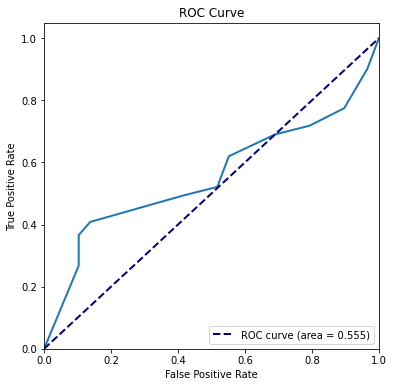

In [24]:
plt.figure()
plt.subplots(figsize=(6, 6))
plt.plot(all_stats[min_v_acc]["fpr"], all_stats[min_v_acc]["tpr"], lw=2)
plt.plot([0, 1], 
         [0, 1], 
         color="navy", 
         lw=2, 
         linestyle="--",
         label="ROC curve (area = %0.3f)" % all_stats[min_v_acc]["auc"])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")

<Figure size 432x288 with 0 Axes>

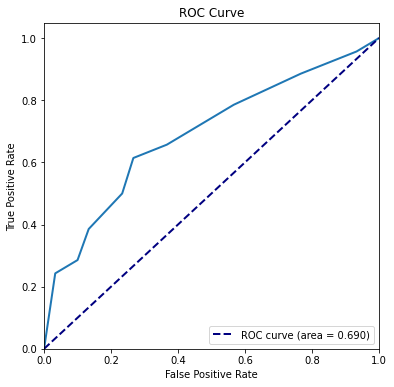

In [25]:
plt.figure()
plt.subplots(figsize=(6, 6))
plt.plot(all_stats[max_v_acc]["fpr"], all_stats[max_v_acc]["tpr"], lw=2)
plt.plot([0, 1], 
         [0, 1], 
         color="navy", 
         lw=2, 
         linestyle="--",
         label="ROC curve (area = %0.3f)" % all_stats[max_v_acc]["auc"])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")

### AUC

<Figure size 432x288 with 0 Axes>

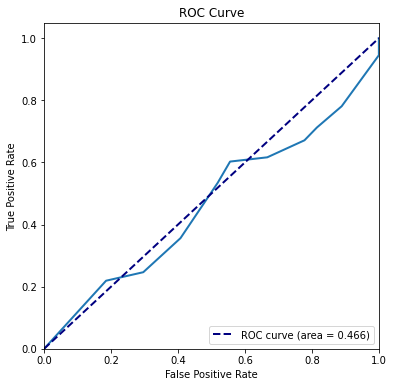

In [26]:
plt.figure()
plt.subplots(figsize=(6, 6))
plt.plot(all_stats[min_v_auc]["fpr"], all_stats[min_v_auc]["tpr"], lw=2)
plt.plot([0, 1], 
         [0, 1], 
         color="navy", 
         lw=2, 
         linestyle="--",
         label="ROC curve (area = %0.3f)" % all_stats[min_v_auc]["auc"])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")

<Figure size 432x288 with 0 Axes>

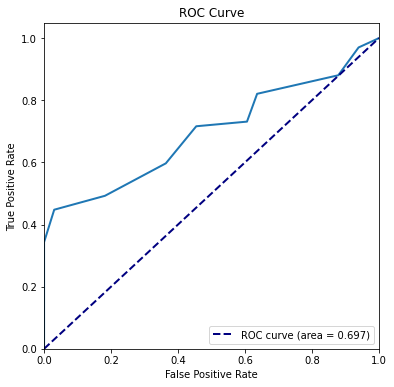

In [27]:
plt.figure()
plt.subplots(figsize=(6, 6))
plt.plot(all_stats[max_v_auc]["fpr"], all_stats[max_v_auc]["tpr"], lw=2)
plt.plot([0, 1], 
         [0, 1], 
         color="navy", 
         lw=2, 
         linestyle="--",
         label="ROC curve (area = %0.3f)" % all_stats[max_v_auc]["auc"])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")

### Mean

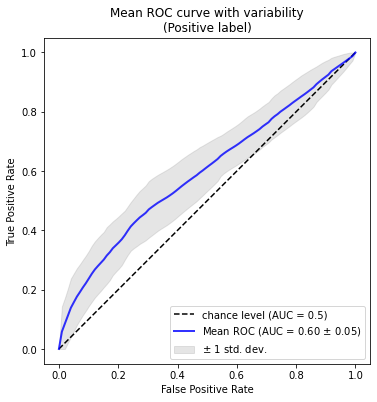

In [28]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = metrics.auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title=f"Mean ROC curve with variability\n(Positive label)",
)
ax.axis("square")
ax.legend(loc="lower right")
plt.show()

### Confusion Matrix for worst and best

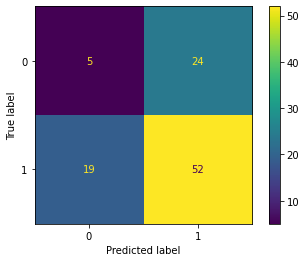

In [29]:
pcm = metrics.ConfusionMatrixDisplay(confusion_matrix=all_stats[min_v]["cm"])
pcm.plot()
plt.show()

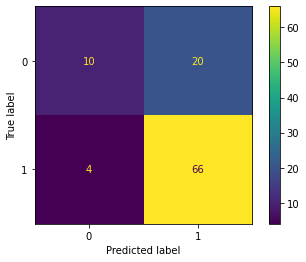

In [30]:
pcm = metrics.ConfusionMatrixDisplay(confusion_matrix=all_stats[max_v]["cm"])
pcm.plot()
plt.show()